In [1]:
%matplotlib inline


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
from pathlib import Path
from pprint import pprint
import sklearn.datasets as dta
import scipy.stats as stats
import plotly.express as px

In [4]:
# Load csv file Resources/homelesess_2012_2022.xlsx
file_path_rental = Path('../Resources/Rental_USA_csv.csv')
# Read the csv file
rental_df = pd.read_csv(file_path_rental)
# Display data
rental_df.head()


,price,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,AK,1745,1856,1908,1909,1957,1940,1903,1900,1967,2016,1990,2340,2420
2,AL,1003,947,945,1022,1103,958,1016,1007,1042,1068,1054,1240,1282
3,AR,809,850,929,953,1075,1045,1081,1083,1121,1149,1134,1334,1379
4,AZ,1218,1162,1201,1210,1222,1227,1260,1263,1307,1340,1323,1556,1609


In [5]:
# Load csv file Resources/homelesess_2012_2022.csv
file_path_hud = Path('../Resources/homelesess_2012_2022.csv')
# Read the csv file
homelesess_df = pd.read_csv(file_path_hud)
# Display data
homelesess_df.head()


,State,"Overall Homeless, 2022","Overall Homeless, 2021","Overall Homeless, 2020","Overall Homeless, 2019","Overall Homeless, 2018","Overall Homeless, 2017","Overall Homeless, 2016","Overall Homeless, 2015","Overall Homeless, 2014","Overall Homeless, 2013","Overall Homeless, 2012"
0,AK,"2,320","1,949","1,949","1,907","2,016","1,845","1,940","1,956","1,784","1,946","1,913"
1,AL,"3,752","2,556","3,351","3,261","3,434","3,793","4,111","3,970","4,561","4,689","5,209"
2,AR,"2,459","2,139","2,366","2,717","2,712","2,467","2,463","2,560","2,936","3,812","4,214"
3,AS,,,,,,,,,,,
4,AZ,"13,553","5,460","10,979","10,007","9,865","8,947","9,707","9,896","10,495","10,562","11,302"


In [6]:
#Changing the type for all columns exept State
# Specify the column to keep as object
object_column = 'price'

# Convert all values to float except the specified object column
rental_df_clean = rental_df.replace(',','', regex = True)
rental_df_clean.loc[:, rental_df_clean.columns != object_column] = rental_df_clean.loc[:, rental_df_clean.columns != object_column].apply(pd.to_numeric, errors='coerce')

In [7]:
condition = (homelesess_df['State'] != 'AS')
# Use boolean indexing to select and keep rows that satisfy the condition
homelesess_df_clean = homelesess_df[condition]

#Changing the type for all columns exept State
# Specify the column to keep as object
object_column = 'State'

# Convert all values to float except the specified object column
homelesess_df_clean = homelesess_df_clean.replace(',','', regex = True)
homelesess_df_clean.loc[:, homelesess_df_clean.columns != object_column] = homelesess_df_clean.loc[:, homelesess_df_clean.columns != object_column].apply(pd.to_numeric, errors='coerce')
homelesess_df_clean.head()

,State,"Overall Homeless, 2022","Overall Homeless, 2021","Overall Homeless, 2020","Overall Homeless, 2019","Overall Homeless, 2018","Overall Homeless, 2017","Overall Homeless, 2016","Overall Homeless, 2015","Overall Homeless, 2014","Overall Homeless, 2013","Overall Homeless, 2012"
0,AK,2320,1949,1949,1907,2016,1845,1940,1956,1784,1946,1913
1,AL,3752,2556,3351,3261,3434,3793,4111,3970,4561,4689,5209
2,AR,2459,2139,2366,2717,2712,2467,2463,2560,2936,3812,4214
4,AZ,13553,5460,10979,10007,9865,8947,9707,9896,10495,10562,11302
5,CA,171521,57468,161548,151278,129972,131532,118142,115738,113952,118552,120098


In [8]:
#Renaming columns
rental_df_clean = rental_df_clean.rename(columns={'Unnamed: 12' : 'rental_2021', 'Unnamed: 13': 'rental_2022',
       'Unnamed: 3' : 'rental_2012', 'Unnamed: 4' : 'rental_2013',
       'Unnamed: 5' : 'rental_2014', 'Unnamed: 6' : 'rental_2015',
       'Unnamed: 7' : 'rental_2016', 'Unnamed: 8' : 'rental_2017',
       'Unnamed: 9' : 'rental_2018', 'Unnamed: 10' : 'rental_2019',
       'Unnamed: 11': 'rental_2020','price': 'State' })


In [9]:
#Deleting data not needed
del rental_df_clean['Unnamed: 1']
del rental_df_clean['Unnamed: 2']
rental_df_clean = rental_df_clean.drop(0)
rental_df_clean.head()

,State,rental_2012,rental_2013,rental_2014,rental_2015,rental_2016,rental_2017,rental_2018,rental_2019,rental_2020,rental_2021,rental_2022
1,AK,1908,1909,1957,1940,1903,1900,1967,2016,1990,2340,2420
2,AL,945,1022,1103,958,1016,1007,1042,1068,1054,1240,1282
3,AR,929,953,1075,1045,1081,1083,1121,1149,1134,1334,1379
4,AZ,1201,1210,1222,1227,1260,1263,1307,1340,1323,1556,1609
5,CA,2031,2132,2237,2345,2465,2469,2555,2619,2585,3040,3143


Enter the year in a range 2012 - 2022:  2022


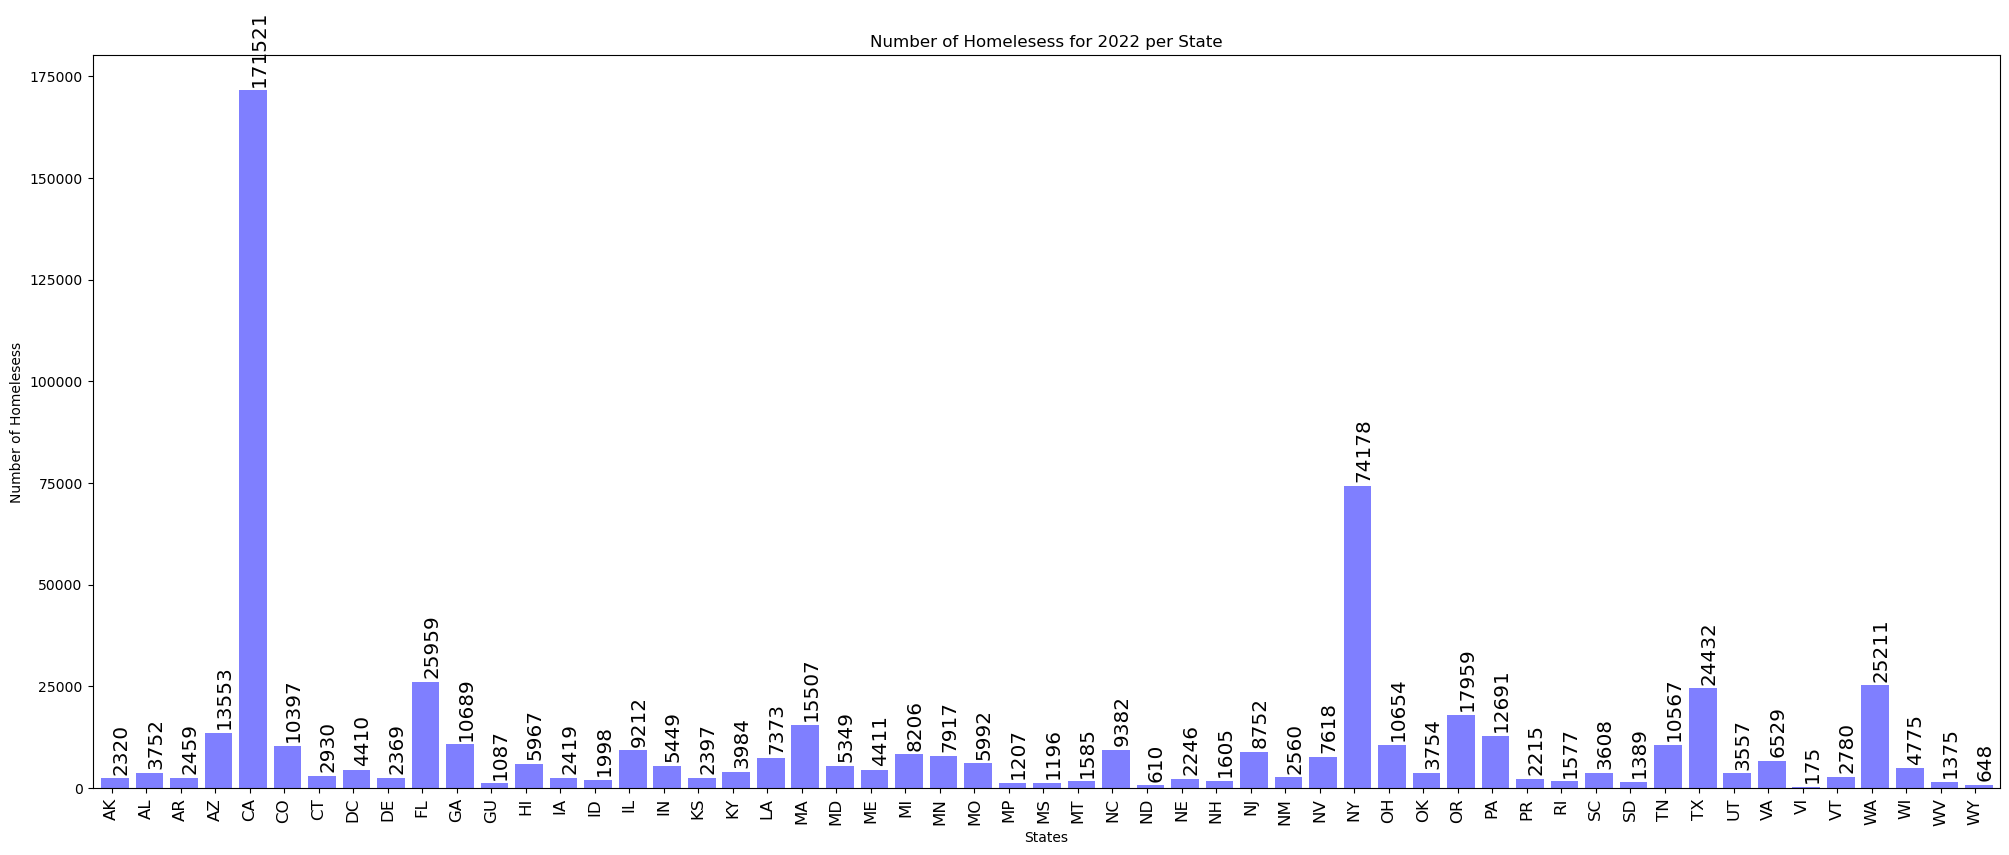

In [10]:
x_axis = np.arange(len(homelesess_df_clean))
value_for_year = input("Enter the year in a range 2012 - 2022: ")
year_value = "Overall Homeless, " + value_for_year
tick_locations = [value + 0.3 for value in x_axis]
plt.figure(figsize=(20,8))
plt.xlim(-0.25, len(x_axis))
plt.bar(x_axis, homelesess_df_clean[year_value], color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations , homelesess_df_clean["State"],rotation="vertical",size = 'large')
plt.tight_layout()
y = homelesess_df_clean[year_value]
for index, value in enumerate(y):
    plt.text(index + 0.3, value + 2000,
             str(value), size = 'x-large',rotation="vertical")
plt.title(f"Number of Homelesess for {value_for_year} per State")
plt.xlabel("States")
plt.ylabel("Number of Homelesess")
plt.savefig("../Outputs/HUD_bar_chat.png")
plt.show()

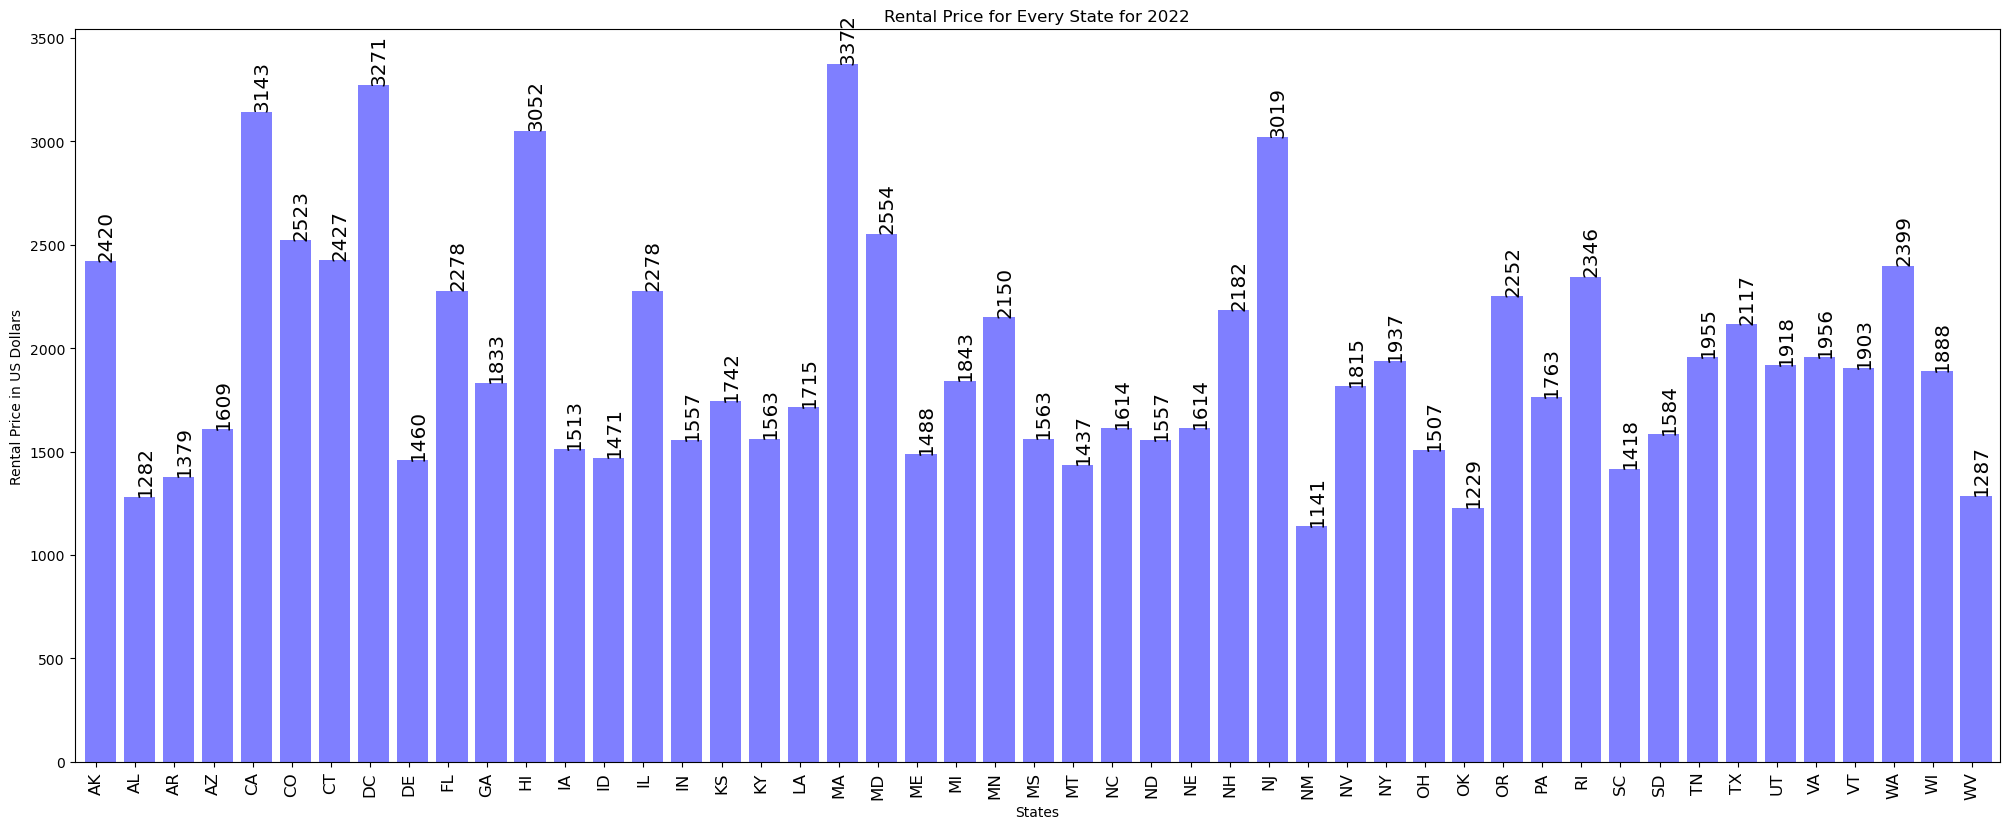

In [11]:
x_axis = np.arange(len(rental_df_clean))
year_value = "rental_" + value_for_year
tick_locations = [value + 0.3 for value in x_axis]
plt.figure(figsize=(20,8))
plt.xlim(-0.25, len(x_axis))
plt.bar(x_axis, rental_df_clean[year_value], color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations , rental_df_clean["State"],rotation="vertical",size = 'large')
plt.tight_layout()
plt.title(f"Rental Price for Every State for {value_for_year}")
plt.xlabel("States")
plt.ylabel("Rental Price in US Dollars")
y = rental_df_clean[year_value]
for index, value in enumerate(y):
    plt.text(index + 0.3, value + 20,
             str(value), size = 'x-large',rotation="vertical")
plt.savefig("../Outputs/HUD_bar_chat.png")
plt.show()

In [12]:
# Determine if there are any potential outliers in the average rental in USA
quartiles = rental_df_clean[year_value].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of rental is: {lowerq}")
print(f"The upper quartile of rental is: {upperq}")
print(f"The interquartile range of rental is: {iqr}")
print(f"The the median of rental is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of rental is: 1557.0
The upper quartile of rental is: 2278.0
The interquartile range of rental is: 721.0
The the median of rental is: 1833.0 
Values below 475.5 could be outliers.
Values above 3359.5 could be outliers.


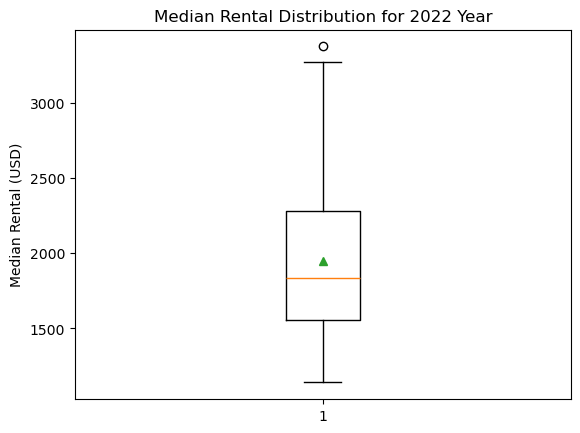

In [13]:
Median_Rental = rental_df_clean[year_value]

fig1, ax1 = plt.subplots()
ax1.set_title(f'Median Rental Distribution for {value_for_year} Year')
ax1.set_ylabel('Median Rental (USD)')
ax1.boxplot(Median_Rental, showmeans=True)
plt.savefig("../Outputs/rental_state_whiskey_plot")
plt.show()

In [14]:
# Set the 'State' to be our index for easy referencing of rows
if 'State' in rental_df_clean.columns:
    rental_df_clean.set_index("State", inplace=True)
else:
    print("Warning: 'State' column not found in DataFrame.")
rental_df_yearly = rental_df_clean.rename(columns={'rental_2022' : '2022', 'rental_2021': '2021',
       'rental_2020' : '2020', 'rental_2019' : '2019',
       'rental_2018' : '2018', 'rental_2017' : '2017',
       'rental_2016' : '2016', 'rental_2015' : '2015',
       'rental_2014': '2014', 'rental_2013' : '2013',
       'rental_2012': '2012'})


In [15]:
outlier_rental = rental_df_yearly[value_for_year].loc[(rental_df_yearly[value_for_year] < lower_bound) | (rental_df_yearly[value_for_year] > upper_bound)]
print(f' Outlier for {value_for_year} Year is : ' +  '\n' + f' {outlier_rental}' )

 Outlier for 2022 Year is : 
 State
MA    3372
Name: 2022, dtype: int64


In [16]:
# Determine if there are any potential outliers in the average homelesses in USA
year_value = "Overall Homeless, " + value_for_year
quartiles = homelesess_df_clean[year_value].quantile([.25,.5,.75])
lowerq = int(quartiles[0.25])
upperq = int(quartiles[0.75])
iqr = upperq-lowerq

print(f"The lower quartile of homelesess is: {lowerq}")
print(f"The upper quartile of homelesses is: {upperq}")
print(f"The interquartile range of homelesess is: {iqr}")
print(f"The the median of homelesess is: {int(quartiles[0.5])} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = int(upperq + (1.5*iqr))
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of homelesess is: 2283
The upper quartile of homelesses is: 9297
The interquartile range of homelesess is: 7014
The the median of homelesess is: 4410 
Values above 19818 could be outliers.


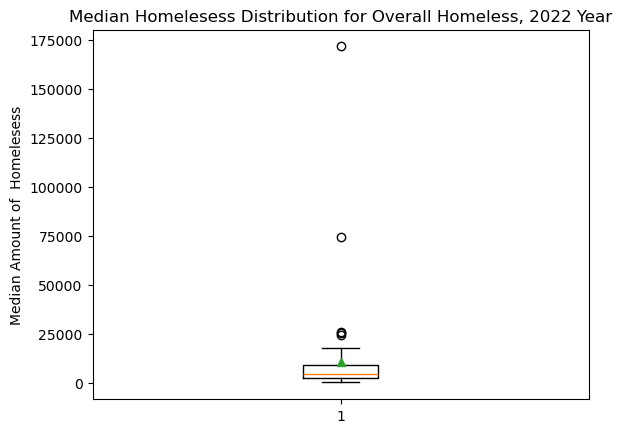

In [17]:
Median_Homelesess = homelesess_df_clean[year_value]
fig1, ax1 = plt.subplots()
ax1.set_title(f'Median Homelesess Distribution for {year_value} Year')
ax1.set_ylabel('Median Amount of  Homelesess')
ax1.boxplot(Median_Homelesess, showmeans=True)
plt.savefig("../Outputs/HUD_state_whiskey_plot")
plt.show()

In [18]:
# Set the 'State' to be our index for easy referencing of rows
if 'State' in homelesess_df_clean.columns:
    homelesess_df_clean.set_index("State", inplace=True)
else:
    print("Warning: 'State' column not found in DataFrame.")
    
homelesess_df_yearly = homelesess_df_clean.rename(columns={'Overall Homeless, 2022' : '2022', 'Overall Homeless, 2021': '2021',
       'Overall Homeless, 2020' : '2020', 'Overall Homeless, 2019' : '2019',
       'Overall Homeless, 2018' : '2018', 'Overall Homeless, 2017' : '2017',
       'Overall Homeless, 2016' : '2016', 'Overall Homeless, 2015' : '2015',
       'Overall Homeless, 2014': '2014', 'Overall Homeless, 2013' : '2013',
       'Overall Homeless, 2012': '2012'})
homelesess_df_yearly.to_csv('../Resources/HUD_States_Data.csv')

In [19]:
outlier_rental = homelesess_df_yearly[value_for_year].loc[(homelesess_df_yearly[value_for_year] < lower_bound) | (homelesess_df_yearly[value_for_year] > upper_bound)]
print(f' Outliers for {value_for_year} Year : ' +  '\n' +
                                   f'{outlier_rental}' )

 Outliers for 2022 Year : 
State
CA    171521
FL     25959
NY     74178
TX     24432
WA     25211
Name: 2022, dtype: object


In [20]:
year_array = [2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]

# Specify the columns for which to calculate the rental average 
columns_to_sum = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022']

# Calculate the sum for specific columns
specific_column_sums = rental_df_yearly[columns_to_sum].mean()

# Convert the result to a NumPy array
sums_array = np.array(specific_column_sums).round()
# Create a DataFrame from the arrays
usa_rental_df = pd.DataFrame({'Year': year_array , 'Average Rental in US': sums_array})

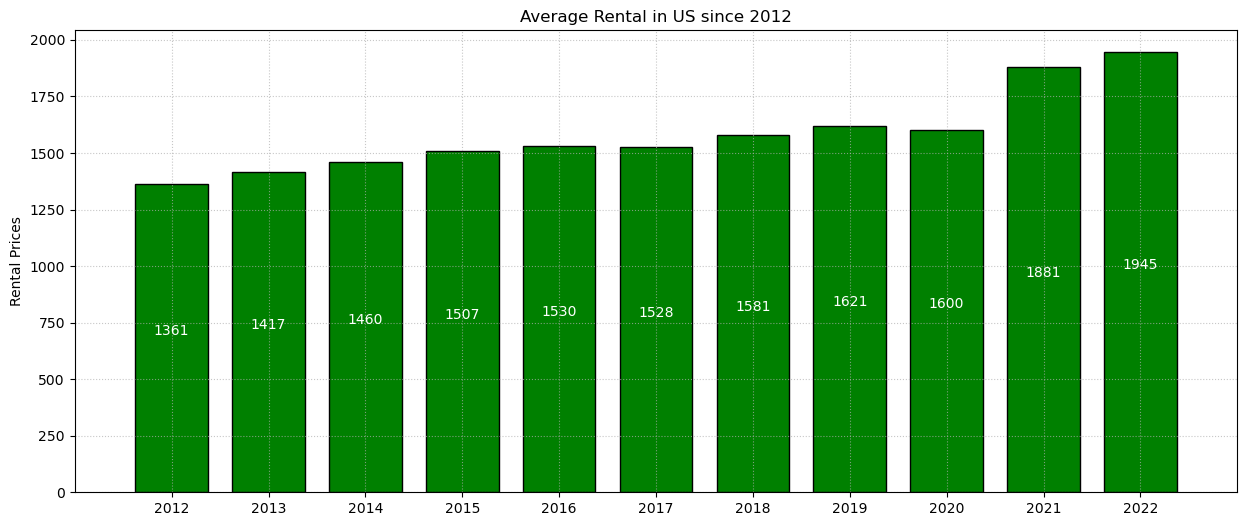

In [21]:
# Rental Change in the US since 2012
# Set values for X, Y axis and bar width
fig = plt.figure(figsize=(15,6))
x = usa_rental_df["Year"]
y = usa_rental_df["Average Rental in US"]
bar_width = 0.75
edgecolor = 'black'

# Plot Bar Chart        
bars = plt.bar(x, y, bar_width, color="g", ec=edgecolor, lw=1)

# Set Graph Properties
plt.ylabel('Rental Prices')
plt.title('Average Rental in US since 2012') 
plt.grid(True,linestyle=':', alpha=0.7)
plt.xlim(2011, x.max()+1)
plt.xticks(x, usa_rental_df["Year"])

# Set the bar value inside each bar
for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., 0.5*height,
                '%s' % (str(int(height))),
                ha='center', va='bottom', color="white")
# Save the figure
plt.savefig("../Outputs/rental_Summary.png")

# Show graph
plt.show()

In [22]:
# Calculate the sum for specific columns
specific_column_sums = homelesess_df_yearly[columns_to_sum].sum().loc[::-1]

# Convert the result to a NumPy array
sums_array = np.array(specific_column_sums)
# Create a DataFrame from the arrays
usa_homelesess_df = pd.DataFrame({'Year': year_array , 'Total Number of US homelesess': sums_array})


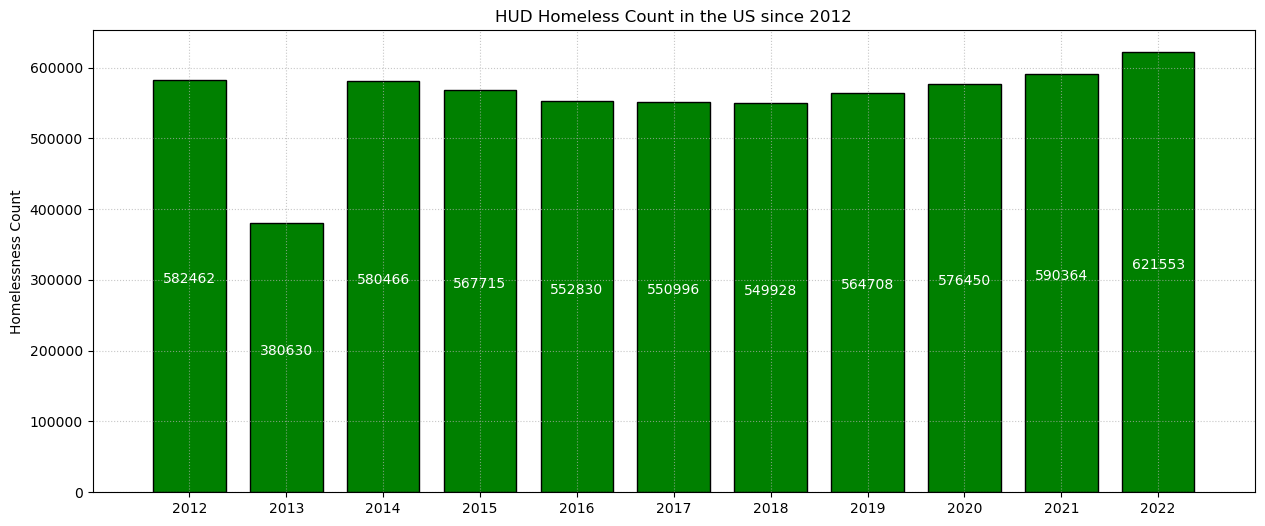

In [23]:
# Homelessness Change in the US since 2012
# Set values for X, Y axis and bar width
fig = plt.figure(figsize=(15,6))
x = usa_homelesess_df["Year"]
y = usa_homelesess_df["Total Number of US homelesess"]
bar_width = 0.75
edgecolor = 'black'

# Plot Bar Chart        
bars = plt.bar(x, y, bar_width, color="g", ec=edgecolor, lw=1)

# Set Graph Properties
plt.ylabel('Homelessness Count')
plt.title('HUD Homeless Count in the US since 2012') 
plt.grid(True,linestyle=':', alpha=0.7)
plt.xlim(2011, x.max()+1)
plt.xticks(x, usa_homelesess_df["Year"])

# Set the bar value inside each bar
for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., 0.5*height,
                '%s' % (str(int(height))),
                ha='center', va='bottom', color="white")
# Save the figure
plt.savefig("../Outputs/Homelesess_Summary.png")

# Show graph
plt.show()

Enter state code in two letters format:  DC


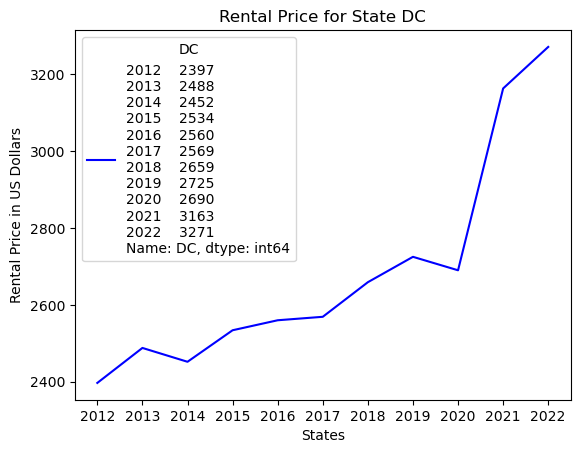

In [24]:
#Enter state code to plot graph
state_value = input('Enter state code in two letters format: ')
# Collect the homelesess number
average_rental = rental_df_yearly[[str(year) for year in range(2012, 2023)]].mean()

# Collect the years where data was collected
years = average_rental.keys()
# Plot the homelesess values for a single state
state_one = plt.plot(years, rental_df_yearly.loc[state_value,["2012","2013","2014","2015","2016","2017",
                                                                  "2018","2019","2020","2021","2022"]],
                                             color="blue",label=rental_df_yearly.loc[state_value])

# Create a legend for our chart
plt.legend(title = state_value, loc="best")
plt.title(f"Rental Price for State {state_value}")
plt.xlabel("States")
plt.ylabel("Rental Price in US Dollars")
plt.savefig("../Outputs/rental_state_graph")
# Show the chart
plt.show()

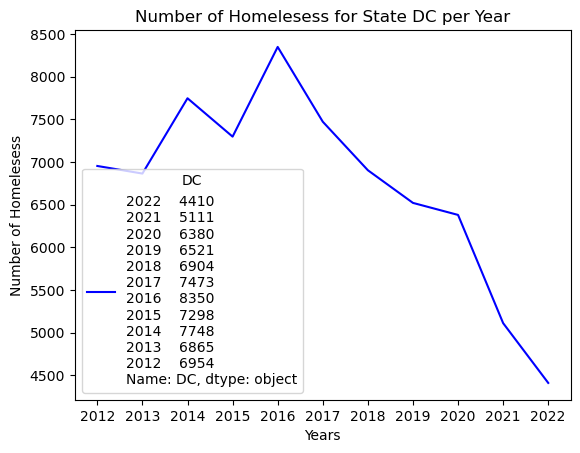

In [25]:
# Collect the homelesess number
average_homelesess = homelesess_df_yearly[[str(year) for year in range(2012, 2023)]].mean()

# Collect the years where data was collected
years = average_homelesess.keys()
# Plot the homelesess values for a single state
state_one = plt.plot(years, homelesess_df_yearly.loc[state_value,["2012","2013","2014","2015","2016","2017",
                                                                  "2018","2019","2020","2021","2022"]],
                                             color="blue",label=homelesess_df_yearly.loc[state_value])

# Create a legend for our chart
#plt.legend(handles=[state_one], loc="best")
plt.legend(title = state_value, loc="best")
plt.title(f"Number of Homelesess for State {state_value} per Year")
plt.xlabel("Years")
plt.ylabel("Number of Homelesess")
plt.savefig("../Outputs/HUD_state_graph")
# Show the chart
plt.show()

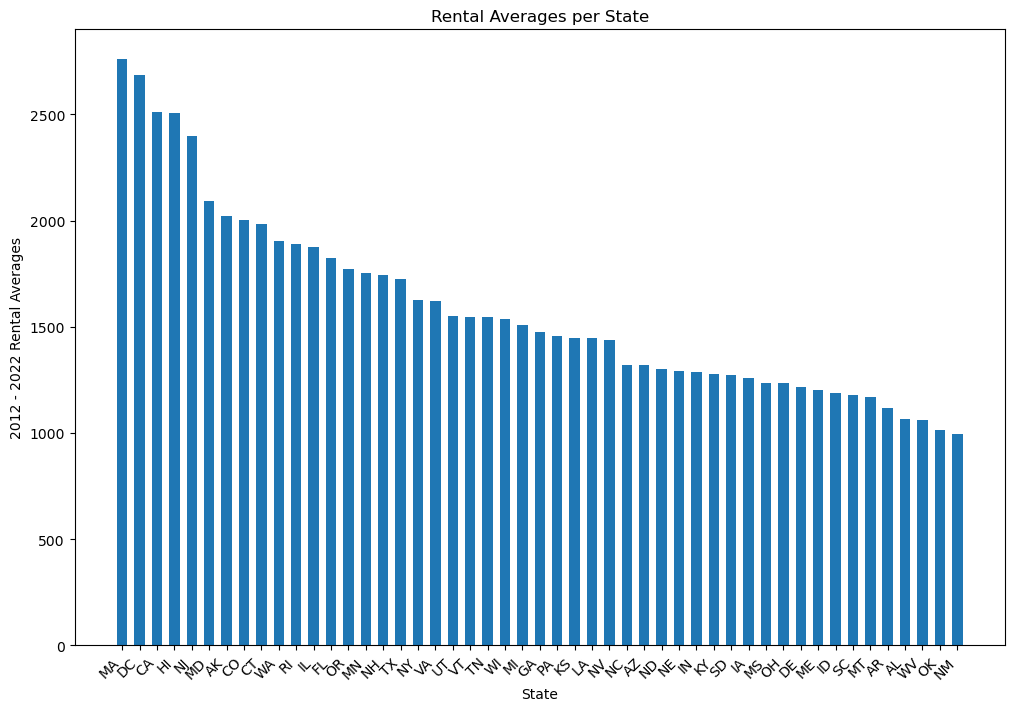

In [26]:
state_averages = rental_df_yearly.mean(axis=1).round()

state_averages_df = pd.DataFrame({"2012 - 2022 Rental Averages": state_averages, "State": rental_df_yearly.index})

state_averages_df = state_averages_df.sort_values(by="2012 - 2022 Rental Averages", ascending=False)


fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.6 


bars = ax.bar(state_averages_df["State"], state_averages_df["2012 - 2022 Rental Averages"], width=bar_width)

plt.title("Rental Averages per State")
plt.xlabel("State")
plt.ylabel("2012 - 2022 Rental Averages")


plt.xticks(rotation=45, ha='right')

plt.savefig("../Outputs/rental_averages_per_state")


plt.show()


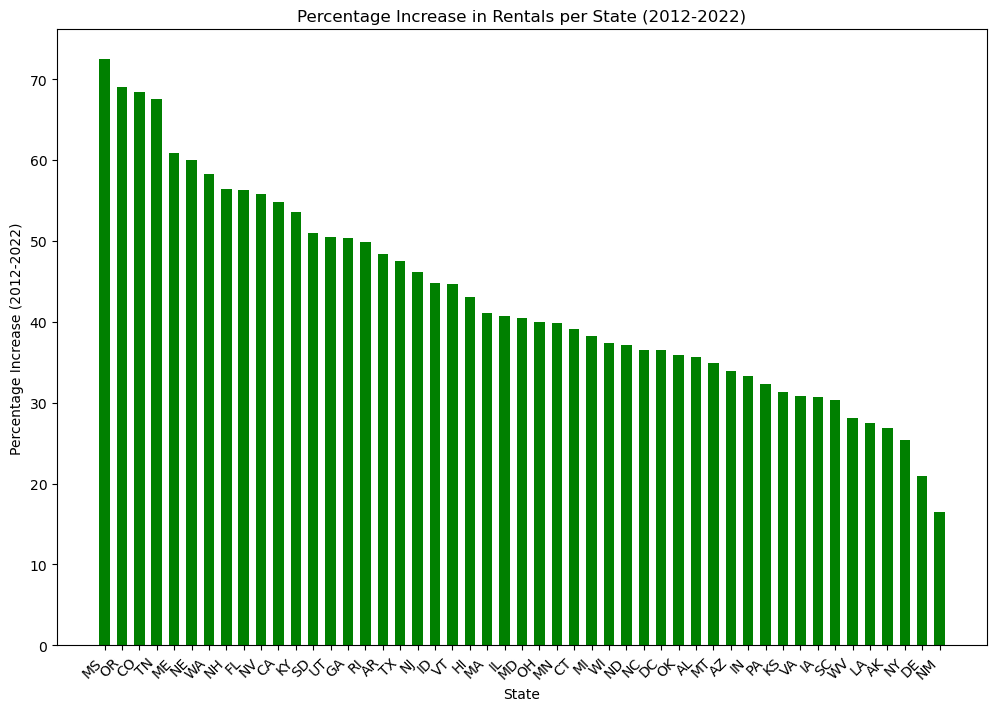

In [27]:
percentage_increase = ((rental_df_yearly.iloc[:, -1] - rental_df_yearly.iloc[:, 0]) / rental_df_yearly.iloc[:, 0] * 100).round(2)


percentage_increase_df = pd.DataFrame({"Percentage Increase (2012-2022)": percentage_increase, "State": rental_df_yearly.index})


percentage_increase_df = percentage_increase_df.sort_values(by="Percentage Increase (2012-2022)", ascending=False)


fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.6


bars = ax.bar(percentage_increase_df["State"], percentage_increase_df["Percentage Increase (2012-2022)"], width=bar_width, color='green')

plt.title("Percentage Increase in Rentals per State (2012-2022)")
plt.xlabel("State")
plt.ylabel("Percentage Increase (2012-2022)")


plt.xticks(rotation=45, ha='right')

plt.savefig("../Outputs/rental_percentage_increase_per_state")

plt.show()

In [28]:
# Load csv file Resources/merge_file.csv
file_path_m = Path('../Resources/merge_file.csv')
# Read the csv file
combined_df = pd.read_csv(file_path_m)
# Display data
combined_df.head()

,State,2022_homelesess,2021_homelesess,2020_homelesess,2019_homelesess,2018_homelesess,2017_homelesess,2016_homelesess,2015_homelesess,2014_homelesess,...,2013_rental,2014_rental,2015_rental,2016_rental,2017_rental,2018_rental,2019_rental,2020_rental,2021_rental,2022_rental
0,AK,2320,1949,1949,1907,2016,1845,1940.0,1956.0,1784.0,...,1909.0,1957.0,1940.0,1903.0,1900.0,1967.0,2016.0,1990.0,2340.0,2420.0
1,AL,3752,2556,3351,3261,3434,3793,4111.0,3970.0,4561.0,...,1022.0,1103.0,958.0,1016.0,1007.0,1042.0,1068.0,1054.0,1240.0,1282.0
2,AR,2459,2139,2366,2717,2712,2467,2463.0,2560.0,2936.0,...,953.0,1075.0,1045.0,1081.0,1083.0,1121.0,1149.0,1134.0,1334.0,1379.0
3,AZ,13553,5460,10979,10007,9865,8947,9707.0,9896.0,10495.0,...,1210.0,1222.0,1227.0,1260.0,1263.0,1307.0,1340.0,1323.0,1556.0,1609.0
4,CA,171521,57468,161548,151278,129972,131532,118142.0,115738.0,113952.0,...,2132.0,2237.0,2345.0,2465.0,2469.0,2555.0,2619.0,2585.0,3040.0,3143.0


In [29]:
#Changing the type for all columns exept State
# Specify the column to keep as object
object_column = 'State'

# Convert all values to float except the specified object column
combined_df_clean = combined_df.copy()  
combined_df_clean.loc[:, combined_df_clean.columns != object_column] = combined_df_clean.loc[:, 
                       combined_df_clean.columns != object_column].apply(pd.to_numeric, errors='coerce')

#combined_df_clean = combined_df_clean.apply(pd.to_numeric, errors='coerce').astype('Int64')
combined_df_clean.head()

,State,2022_homelesess,2021_homelesess,2020_homelesess,2019_homelesess,2018_homelesess,2017_homelesess,2016_homelesess,2015_homelesess,2014_homelesess,...,2013_rental,2014_rental,2015_rental,2016_rental,2017_rental,2018_rental,2019_rental,2020_rental,2021_rental,2022_rental
0,AK,2320,1949,1949,1907,2016,1845,1940.0,1956.0,1784.0,...,1909.0,1957.0,1940.0,1903.0,1900.0,1967.0,2016.0,1990.0,2340.0,2420.0
1,AL,3752,2556,3351,3261,3434,3793,4111.0,3970.0,4561.0,...,1022.0,1103.0,958.0,1016.0,1007.0,1042.0,1068.0,1054.0,1240.0,1282.0
2,AR,2459,2139,2366,2717,2712,2467,2463.0,2560.0,2936.0,...,953.0,1075.0,1045.0,1081.0,1083.0,1121.0,1149.0,1134.0,1334.0,1379.0
3,AZ,13553,5460,10979,10007,9865,8947,9707.0,9896.0,10495.0,...,1210.0,1222.0,1227.0,1260.0,1263.0,1307.0,1340.0,1323.0,1556.0,1609.0
4,CA,171521,57468,161548,151278,129972,131532,118142.0,115738.0,113952.0,...,2132.0,2237.0,2345.0,2465.0,2469.0,2555.0,2619.0,2585.0,3040.0,3143.0


In [30]:
# Load csv file Resources/homelesess_2012_2022.xlsx
file_path = Path('../Resources/population_2012_2022.csv')
# Read the csv file
population_df = pd.read_csv(file_path)
#print df 
population_df.head()

,State,Population 2012,Population 2013,Population 2014,Population 2015,Population 2016,Population 2017,Population 2018,Population 2019,Population 2020,Population 2021,Population 2022
0,AK,730810,737626,737075,738430,742575,740983,736624,733603,733374,734923,733276
1,AL,4816632,4831586,4843737,4854803,4866824,4877989,4891628,4907965,5024294,5050380,5073903
2,AR,2952876,2960459,2968759,2979732,2991815,3003855,3012161,3020985,3011490,3028443,3046404
3,AZ,6556344,6634690,6732873,6832810,6944767,7048088,7164228,7291843,7157902,7272487,7365684
4,CA,37944551,38253768,38586706,38904296,39149186,39337785,39437463,39437610,39538212,39145060,39040616


In [31]:
x_axis = np.arange(len(population_df))
value_for_year_1 = "2012"
value_for_year_2 = "2022"
year_value_1 = "Population " + value_for_year_1
year_value_2 = "Population " + value_for_year_2

In [32]:
column_number_1 = "Population " + value_for_year_1
column_number_2 = "Population " + value_for_year_2

# Get the top 10 values for both years
top_10_1 = population_df.nlargest(10, column_number_1)[['State', column_number_1]]
top_10_2 = population_df.nlargest(10, column_number_2)[['State', column_number_2]]

In [33]:
top_10_population_df_1 = pd.DataFrame({'State': top_10_1['State'].tolist(), column_number_1: top_10_1[column_number_1].tolist()})

top_10_population_df_1.head(10)

,State,Population 2012
0,CA,37944551
1,TX,26084120
2,NY,19574362
3,FL,19302016
4,IL,12883029
5,PA,12769123
6,OH,11550971
7,GA,9903580
8,MI,9898289
9,NC,9751810


In [34]:
top_10_population_df_2 = pd.DataFrame({'State': top_10_2['State'].tolist(), column_number_2: top_10_2[column_number_2].tolist()})

top_10_population_df_2.head(10)

,State,Population 2022
0,CA,39040616
1,TX,30029848
2,FL,22245521
3,NY,19673200
4,PA,12972091
5,IL,12582515
6,OH,11759697
7,GA,10913150
8,NC,10695965
9,MI,10033281


In [35]:
column_number_3 = value_for_year_1 + "_homelesess"
column_number_4 = value_for_year_2 + "_homelesess"
top_10_homelessness_3 = combined_df_clean.nlargest(10, column_number_3)[['State', column_number_3]]
top_10_homelessness_4 = combined_df_clean.nlargest(10, column_number_4)[['State', column_number_4]]

In [36]:
top_10_homelessness_df_1 = pd.DataFrame({'State': top_10_homelessness_3['State'].tolist(), column_number_3: top_10_homelessness_3[column_number_3].tolist()})

# Display the new DataFrame
top_10_homelessness_df_1.head(10)

,State,2012_homelesess
0,CA,120098.0
1,NY,69566.0
2,FL,55170.0
3,TX,34052.0
4,GA,20516.0
5,WA,20504.0
6,MA,17501.0
7,CO,16768.0
8,OR,15828.0
9,PA,14736.0


In [37]:
top_10_homelessness_df_2 = pd.DataFrame({'State': top_10_homelessness_4['State'].tolist(), column_number_4: top_10_homelessness_4[column_number_4].tolist()})

# Display the new DataFrame
top_10_homelessness_df_2.head(10)

,State,2022_homelesess
0,CA,171521
1,NY,74178
2,FL,25959
3,WA,25211
4,TX,24432
5,OR,17959
6,MA,15507
7,AZ,13553
8,PA,12691
9,GA,10689


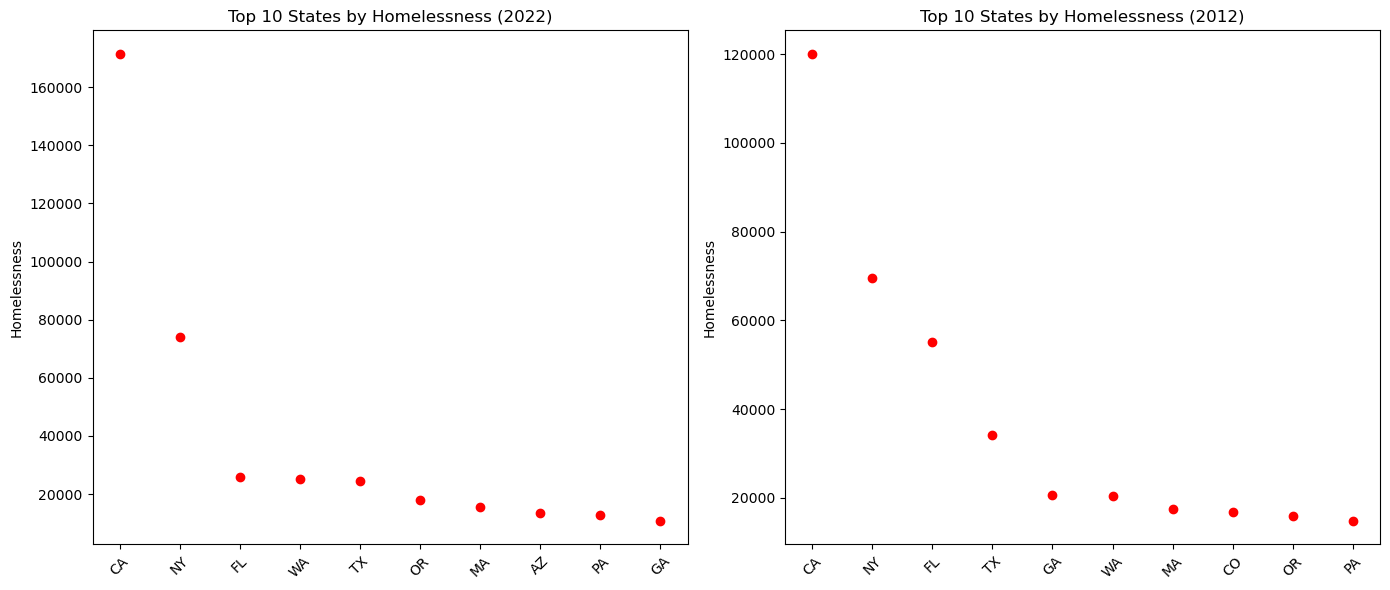

In [38]:
# Set up figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for population in the first subplot
ax1.scatter(top_10_homelessness_df_2['State'], top_10_homelessness_df_2[column_number_4], color='red', marker='o')
ax1.set_title(f'Top 10 States by Homelessness ({value_for_year_2})')
ax1.set_ylabel('Homelessness')

# Scatter plot for homelessness in the second subplot
ax2.scatter(top_10_homelessness_df_1['State'], top_10_homelessness_df_1[column_number_3], color='red', marker='o')
ax2.set_title(f'Top 10 States by Homelessness ({value_for_year_1})')
ax2.set_ylabel('Homelessness')

# Rotate x-axis labels for better readability
ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot as an image
plt.savefig('../Outputs/top_ten_states_by_homelessness_2022_2012.jpg')

# Show the plot
plt.show()

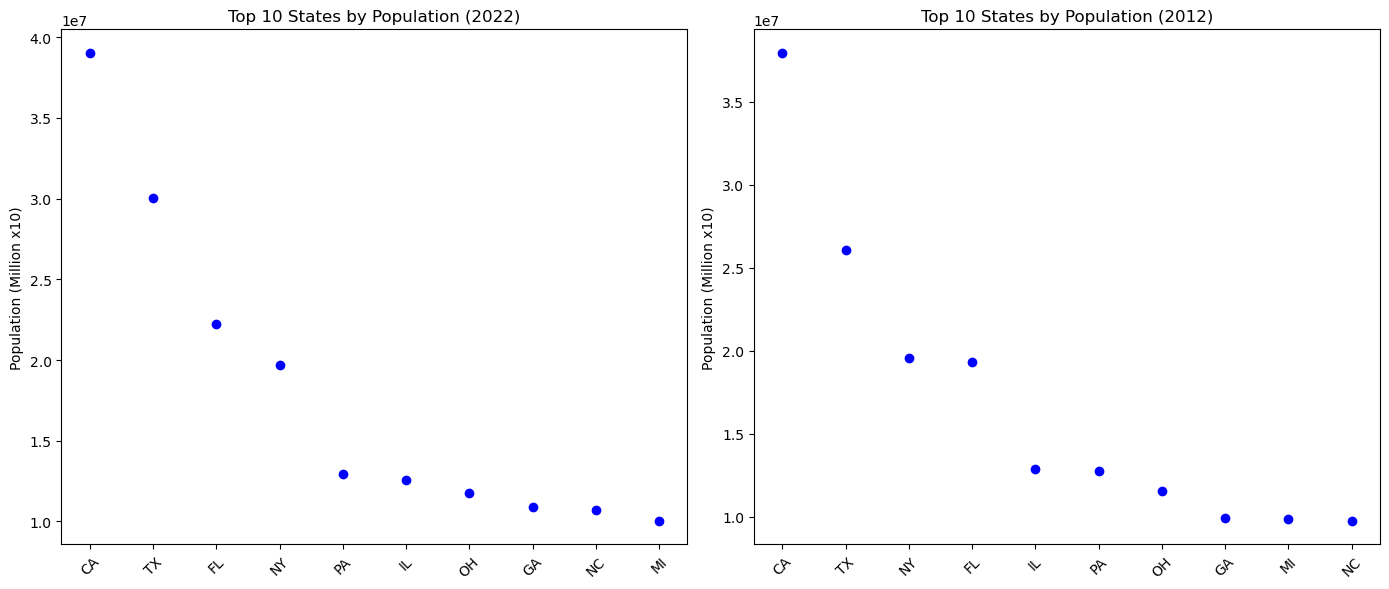

In [39]:
# Set up figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for population in the first subplot (year 2)
ax1.scatter(top_10_population_df_2['State'], top_10_population_df_2[column_number_2], color='blue', marker='o')
ax1.set_title(f'Top 10 States by Population ({value_for_year_2})')
ax1.set_ylabel('Population (Million x10)')

# Scatter plot for population in the second subplot (year 1)
ax2.scatter(top_10_population_df_1['State'], top_10_population_df_1[column_number_1], color='blue', marker='o')
ax2.set_title(f'Top 10 States by Population ({value_for_year_1})')
ax2.set_ylabel('Population (Million x10)')

# Rotate x-axis labels for better readability
ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot as an image
plt.savefig('../Outputs/top_ten_states_by_population_2022_2012.jpg')

# Show the plot
plt.show()

In [40]:
# Assuming 'State' column is common in both DataFrames
correlation_df = pd.merge(top_10_population_df_1, top_10_homelessness_df_1, on='State')

# Extract the relevant columns for correlation
population_column = correlation_df[column_number_1]
homelessness_column = correlation_df[column_number_3]

# Calculate the correlation coefficient
correlation_1 = population_column.corr(homelessness_column)

# Display the correlation coefficient
print(f'Correlation between Population and Homelessness in year 2012 is : {correlation_1}')

if correlation_1 < 0.3 :
    print(f"we have None or very weak correlation")
elif correlation_1 > 0.3 and correlation_1 <0.5 :
    print (f"we have Weak correlation")
elif correlation_1 > 0.5 and correlation_1 <0.7 :
    print (f"We have Moderate correlation")
elif correlation_1 > 0.7 :
    print(f"We have Strong correlation")

Correlation between Population and Homelessness in year 2012 is : 0.8554764530855836
We have Strong correlation


In [41]:
# Assuming 'State' column is common in both DataFrames
correlation_df_2 = pd.merge(top_10_population_df_2, top_10_homelessness_df_2, on='State')

# Extract the relevant columns for correlation
population_column_2 = correlation_df_2[column_number_2]
homelessness_column_2 = correlation_df_2[column_number_4]

# Calculate the correlation coefficient
correlation_2 = population_column_2.corr(homelessness_column_2)

# Display the correlation coefficient
print(f'Correlation between Population and Homelessness for {value_for_year_2}: {correlation_2}')

if correlation_2 < 0.3 :
    print(f"we have None or very weak correlation")
elif correlation_2 > 0.3 and correlation_2 <0.5 :
    print (f"we have Weak correlation")
elif correlation_2 > 0.5 and correlation_2 <0.7 :
    print (f"We have Moderate correlation")
elif correlation_2 > 0.7 :
    print(f"We have Strong correlation")


Correlation between Population and Homelessness for 2022: 0.7752122146731447
We have Strong correlation


In [42]:
import requests
import json

from config_key import geoapify_key

# List of states
states = ['California', 'New York', 'Florida', 'Washington D. C.', 'Texas']

# Initialize an empty list to store the results
results = []

# Iterate over each state
for state in states:
    
    # Build the endpoint URL
    target_country = f"{state}, USA"
    target_url = f"https://api.geoapify.com/v1/geocode/search?text={target_country}&format=json&apiKey={geoapify_key}"

    # Make the API request
    response = requests.get(target_url)
    data = response.json()

    # Check if the request was successful
    if response.status_code == 200:
        
        # Append the result to the list
        results.append(data)
    else:
        print(f"Error for {state}: {data}")

# Display the results
print(json.dumps(results, indent=2))
 

[
  {
    "results": [
      {
        "datasource": {
          "sourcename": "openstreetmap",
          "attribution": "\u00a9 OpenStreetMap contributors",
          "license": "Open Database License",
          "url": "https://www.openstreetmap.org/copyright"
        },
        "ref": "CA",
        "country": "United States",
        "country_code": "us",
        "state": "California",
        "lon": -118.755997,
        "lat": 36.7014631,
        "state_code": "CA",
        "formatted": "California, United States of America",
        "address_line1": "California",
        "address_line2": "United States of America",
        "category": "administrative",
        "timezone": {
          "name": "America/Los_Angeles",
          "offset_STD": "-08:00",
          "offset_STD_seconds": -28800,
          "offset_DST": "-07:00",
          "offset_DST_seconds": -25200,
          "abbreviation_STD": "PST",
          "abbreviation_DST": "PDT"
        },
        "plus_code": "8583P62V+HJ",
   

In [43]:
from pprint import pprint

for i in range (0,5):

    pprint(results[i]['results'][0]['state'])
    pprint(results[i]['results'][0]['lat'])
    pprint(results[i]['results'][0]['lon'])

'California'
36.7014631
-118.755997
'New York'
40.7127281
-74.0060152
'Florida'
28.5421109
-81.3790304
'District of Columbia'
38.8950368
-77.0365427
'Texas'
31.2638905
-98.5456116


In [46]:
state_list = [results[i]['results'][0]['state'] for i in range(5)]
latitude_list = [results[i]['results'][0]['lat'] for i in range(5)]
longitude_list = [results[i]['results'][0]['lon'] for i in range(5)]

# Create a DataFrame
df = pd.DataFrame({'State': state_list, 'Latitude': latitude_list, 'Longitude': longitude_list})

# Display the DataFrame
df.head()

,State,Latitude,Longitude
0,California,36.701463,-118.755997
1,New York,40.712728,-74.006015
2,Florida,28.542111,-81.379030
3,District of Columbia,38.895037,-77.036543
4,Texas,31.263890,-98.545612


In [47]:

import hvplot.pandas


KeyError: '3.3.2'

In [ ]:


map_plot = df.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
 #   scale = 0.01,
    color = "State",
    size = 250,
    title = "Top 5 states with highest number of homeless in the USA in 2022"
)

hvplot.save(map_plot,"../Outputs/map_plot.png")

# Display the map plot
map_plot

In [ ]:
def linear_regression_plot(x, y):
    # Perform linear regression
    pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(x, y.astype(int))
    regression_line = pe_slope * np.array(x) + pe_int

    print(f'The r-value is: {round(pe_r,2)}')

    # Plotting
    plt.scatter(x, y, label='Data Points')
    plt.plot(x, regression_line, color='red', label='Linear Regression')
    plt.annotate(f'y = {round(pe_slope,2)}x + {round(pe_int,2)}', xy=(min(x)+5,min(y)), 
                 xycoords='data', color='red', size=15)

In [ ]:
merge_data = Path("../Resources/merge_file_new.csv")
merge_df = pd.read_csv(merge_data)
merge_df.head()

In [ ]:
state_correlation = []
p_value_correlation = []

for k in merge_df["State"].index:
    homelesess = merge_df.iloc[k,1:12].values
    rental_price=merge_df.iloc[k,12:24].values
    pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(homelesess.astype(int), rental_price.astype(int))
    state_correlation.append(pe_r)
    p_value_correlation.append(pe_p)
    
state_correlation

In [ ]:
fig = px.choropleth(locations=merge_df["State"], locationmode="USA-states", 
                    color=state_correlation, scope="usa", 
                    color_continuous_scale="Viridis")
fig.update_layout(margin=dict(l=60, r=60, t=50, b=50))
fig.layout.coloraxis.colorbar.title = 'Correlation Coefficients'
fig.show()


In [ ]:
ca_idx = merge_df.loc[merge_df["State"]=='CA'].index
ca_idx = ca_idx[0]
homelesess_CA = merge_df.iloc[ca_idx,1:12].values
rental_price_CA=merge_df.iloc[ca_idx,12:24].values
linear_regression_plot(homelesess_CA.astype(int), rental_price_CA.astype(int))
plt.title("California")
plt.xlabel("Homelesess")
plt.ylabel("Rental price")
plt.show()

In [ ]:
idx_min = min(state_correlation)
idx = state_correlation.index(idx_min)
name_state = merge_df.loc[idx,'State']
homelesess_value= merge_df.iloc[idx,1:12].values
rental_price_value=merge_df.iloc[idx,12:24].values
linear_regression_plot(homelesess_value.astype(int), rental_price_value.astype(int))
plt.title("Maryland")
plt.xlabel("Homelesess")
plt.ylabel("Rental price")
plt.show()

In [ ]:
idx_min = max(state_correlation)
idx = state_correlation.index(idx_min)
name_state = merge_df.loc[idx,'State']
homelesess_value= merge_df.iloc[idx,1:12].values
rental_price_value=merge_df.iloc[idx,12:24].values
linear_regression_plot(homelesess_value.astype(int), rental_price_value.astype(int))
plt.title("Delaware")
plt.xlabel("Homelesess")
plt.ylabel("Rental price")
plt.show()

In [ ]:
merge_df_correlation = merge_df
merge_df_correlation['Correlation'] = state_correlation
merge_df_correlation['p_value_correlations'] = p_value_correlation
merge_df_correlation.head()

In [ ]:
neg_correlation = merge_df_correlation.loc[(merge_df_correlation['Correlation']<=0)&(merge_df_correlation['p_value_correlations']<=0.05),['State','Correlation']]
num_neg = neg_correlation["Correlation"].count().astype(int)/len(merge_df['Correlation'])*100

In [ ]:
pos_correlation = merge_df_correlation.loc[(merge_df_correlation['Correlation']>=0)&(merge_df_correlation['p_value_correlations']<=0.05),['State','Correlation']]
num_pos = pos_correlation["Correlation"].count().astype(int)/len(merge_df['Correlation'])*100

In [ ]:
no_correlation = merge_df_correlation.loc[(merge_df_correlation['p_value_correlations']>0.05),['State','Correlation']]
num_no = no_correlation["Correlation"].count().astype(int)/len(merge_df['Correlation'])*100

In [ ]:
data = [[neg_correlation["Correlation"].count().astype(int),num_neg],[pos_correlation["Correlation"].count().astype(int),num_pos],[no_correlation["Correlation"].count().astype(int),num_no]]
correlation_data = pd.DataFrame(data, columns=['State_count', 'Correlation'])
correlation_data

In [ ]:
colors = ['C1','C3','C8']
myexplode = [0.08, 0.08, 0.08]
mylabels = ['State negative correlated', 'State postive correlated','State no correlated']
plt.pie(correlation_data['Correlation'], colors= colors, explode = myexplode, shadow= True, autopct = '%.2f %%',labels = mylabels)
plt.show() 


In [ ]:
correlation_data['expected'] = [49 / 3] * 3
expected_counts = [49 / 3] * 3
correlation_data

In [ ]:
critical_value = stats.chi2.ppf(q = 0.95, df = 2)
print(critical_value)
stats.chisquare(correlation_data['State_count'], correlation_data['expected'])